In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import simulate
import sharpe
import seaborn as sns
import calculate_return as cr
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('figure', titlesize=13)  # fontsize of the figure title

Fetching data

In [2]:
GARCH = cr.fetch_returns(sim_type = 'garch', random_seeds = range(10000))
norm = cr.fetch_returns(sim_type = 'norm', random_seeds = range(10000))

In [3]:
t = cr.fetch_returns(sim_type = 't', random_seeds = range(10000))
draw = cr.fetch_returns(sim_type = 'draw', random_seeds = range(10000))

Combining data

In [4]:
def variable(variable):
    Data=GARCH[[variable]].rename(columns={variable:'GJR-GARCH(1,1)\n (Baseline)'})
    Data["Normal"]=norm[variable]
    Data["Student's t"]=t[variable]
    Data["Draws"]=draw[variable]
    return Data

Plotting figure

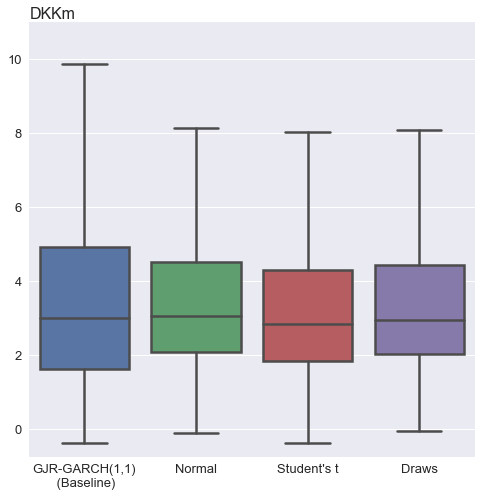

In [7]:
Data = variable("single_phase")
x = Data.loc[(slice(None), '2070-01-01'),:]
x = pd.melt(x)
x['value'] = x['value'].div(1000000) #Convert into millions
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.boxplot(x='variable',y='value',data=x,showfliers = False,linewidth=2.5)
ax.set_ylabel("DKKm", rotation=0, loc='top', labelpad=-68)
plt.xlabel("")
plt.ylim(-0.75,11)
plt.ticklabel_format(style='plain', axis='y',useOffset=True)
plt.savefig("Robustness/boxplot_SIM_S.png", bbox_inches = 'tight', pad_inches = 0.1, dpi=192)

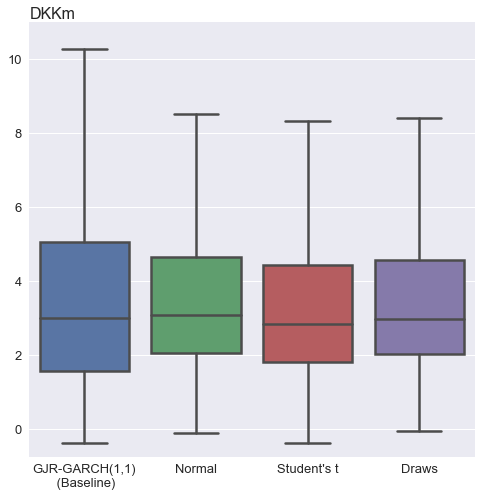

In [8]:
Data = variable("dual_phase")
x = Data.loc[(slice(None), '2070-01-01'),:]
x = pd.melt(x)
x['value'] = x['value'].div(1000000) #Convert into millions
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.boxplot(x='variable',y='value',data=x,showfliers = False,linewidth=2.5)
ax.set_ylabel("DKKm", rotation=0, loc='top', labelpad=-68)
plt.xlabel("")
plt.ylim(-0.75,11)
plt.ticklabel_format(style='plain', axis='y',useOffset=True)
plt.savefig("Robustness/boxplot_SIM_D.png", bbox_inches = 'tight', pad_inches = 0.1, dpi=192)

Defaults per strategy

In [5]:
GARCH_defaulted = GARCH.loc[(slice(None), '2070-01-01'),:]
GARCH_defaulted = GARCH_defaulted[GARCH_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_GARCH=GARCH_defaulted['random_state'].tolist()

t_defaulted = t.loc[(slice(None), '2070-01-01'),:]
t_defaulted = t_defaulted[t_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_t=t_defaulted['random_state'].tolist()

norm_defaulted = norm.loc[(slice(None), '2070-01-01'),:]
norm_defaulted = norm_defaulted[norm_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_norm=norm_defaulted['random_state'].tolist()

draw_defaulted = draw.loc[(slice(None), '2070-01-01'),:]
draw_defaulted = draw_defaulted[draw_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_draw=draw_defaulted['random_state'].tolist()
#print number of defaults
print(len(defaulted_GARCH))
print(len(defaulted_t))
print(len(defaulted_norm))
print(len(defaulted_draw))

112
78
0
0


In [7]:
print(t["market_returns"].mean())
print(GARCH["market_returns"].mean())
print(norm["market_returns"].mean())
print(draw["market_returns"].mean())

0.006124951207506208
0.00651876230908018
0.006274889207486074
0.006224014091965755


Certainty Equivalent

In [9]:
#sharpe.CE_ports(t,risk_premium=True)
#sharpe.CE_ports(GARCH,risk_premium=True)
#sharpe.CE_ports(norm,risk_premium=True)
sharpe.CE_ports(draw,risk_premium=True)

,dual_phase,single_phase,100,9050
Certainty Equivalent,47.676,43.692,36.711,24.941


Sharpe Ratio

In [4]:
sharpe2 = sharpe.calculate_sharpe(t)
sharpe3 = sharpe.calculate_sharpe(GARCH)
sharpe4 = sharpe.calculate_sharpe(norm)
sharpe5 = sharpe.calculate_sharpe(draw)

In [6]:
print(sharpe3.std())
print(sharpe2.std())
print(sharpe4.std())
print(sharpe5.std())

Dual phase     0.090
Single phase   0.090
100% stocks    0.088
Life cycle     0.092
dtype: float64
Dual phase     0.064
Single phase   0.064
100% stocks    0.076
Life cycle     0.078
dtype: float64
Dual phase     0.049
Single phase   0.048
100% stocks    0.068
Life cycle     0.070
dtype: float64
Dual phase     0.051
Single phase   0.050
100% stocks    0.069
Life cycle     0.070
dtype: float64


In [10]:
mean_median_2 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe2.mean(), sharpe2.median())]
mean_median_3 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe3.mean(), sharpe3.median())]
mean_median_4 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe4.mean(), sharpe4.median())]
mean_median_5 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe5.mean(), sharpe5.median())]

In [11]:
print(mean_median_2)
print(mean_median_3)
print(mean_median_4)
print(mean_median_5)


['0.223 [0.249]', '0.222 [0.248]', '0.200 [0.199]', '0.194 [0.191]']
['0.158 [0.210]', '0.157 [0.210]', '0.208 [0.208]', '0.193 [0.192]']
['0.239 [0.245]', '0.237 [0.244]', '0.203 [0.202]', '0.199 [0.197]']
['0.241 [0.253]', '0.239 [0.251]', '0.204 [0.202]', '0.199 [0.196]']
